## import

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from vae_pipeline import run_vae_pipeline
from evaluate_anomaly import evaluate_anomaly_detection
import preprocess

2025-12-19 01:03:40.980067: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-19 01:03:41.026584: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX512_FP16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-19 01:03:41.699721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
RAW_DIR = Path("../data/raw")
INTERIM_DIR = Path("../data/interim")
PROCESSED_DIR = Path("../data/processed")

## T1105(full) DrainによるEventId

### データ作成

In [4]:
preprocess.prepare_deeplog_file(
    logdata_filepath = RAW_DIR/"T1105(full)/security2_structured.csv",
    output_dir = INTERIM_DIR/"T1105(full)",
    window_size = 100,
    step_size = 50,
    mode = "fixed", 
    features = ["EventId"]
)

there are 20552 instances (sliding windows) in this dataset

training size 16425
test normal size 4107
test abnormal size 20
Sequence Length Statistics Report
Generated: 2025-12-17 22:09:23
Mode: fixed
Window Size: 100
Step Size: 50

[Ratio: 0.8]
--------------------------------------------------
  train:
    Count:    16,425
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00
  test_normal:
    Count:    4,107
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00
  test_abnormal:
    Count:    20
    Avg Len:  100.00
    Min Len:  100
    Max Len:  100
    Std Dev:  0.00


Statistics saved to: ../data/interim/T1105(full)/seq_stats.txt


In [ ]:
# one-hot-embed でテンソルへ変換
preprocess.convert_deeplog_to_ohe_npz(
    input_dir = Path("../data/interim/T1105(full)/ratio_0.8"),
    output_dir = Path("../data/processed/T1105(full)/ratio_0.8")
)

Building vocabulary from all data files...
Vocab size: 57
Processing ../data/interim/T1105(full)/ratio_0.8/train ...
  Max sequence length: 100
  Saved to ../data/processed/T1105(full)/ratio_0.8/train.npz (Shape: (16425, 100, 57))
Processing ../data/interim/T1105(full)/ratio_0.8/test_normal ...
  Max sequence length: 100
  Saved to ../data/processed/T1105(full)/ratio_0.8/test_normal.npz (Shape: (4107, 100, 57))
Processing ../data/interim/T1105(full)/ratio_0.8/test_abnormal ...
  Max sequence length: 100
  Saved to ../data/processed/T1105(full)/ratio_0.8/test_abnormal.npz (Shape: (20, 100, 57))
Done.


### train

2025-12-17 22:15:35.161661: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22323 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-12-17 22:15:35.163527: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22323 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-12-17 22:15:35.165132: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22323 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:81:00.0, compute capability: 8.6
2025-12-17 22:15:35.166760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22323 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

Epoch 1/1000


I0000 00:00:1765977343.583586  509516 service.cc:145] XLA service 0x76a8bc014dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765977343.583634  509516 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765977343.583639  509516 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765977343.583643  509516 service.cc:153]   StreamExecutor device (2): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765977343.583647  509516 service.cc:153]   StreamExecutor device (3): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-12-17 22:15:44.168189: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-17 22:15:44.978696: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 31/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 85.4673 - loss: 17159.7200 - reconstruction_loss: 5691.4176 

I0000 00:00:1765977348.553178  509516 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


924/924 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - kl_loss: 241.4605 - loss: 2666.7617 - reconstruction_loss: 808.4329 - learning_rate: 0.0010
Epoch 2/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - kl_loss: 219.0599 - loss: 2135.3328 - reconstruction_loss: 638.7581 - learning_rate: 0.0010
Epoch 3/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 197.0079 - loss: 2071.5811 - reconstruction_loss: 624.8571 - learning_rate: 0.0010
Epoch 4/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 184.2025 - loss: 2032.3474 - reconstruction_loss: 616.0483 - learning_rate: 0.0010
Epoch 5/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 178.3194 - loss: 2004.9220 - reconstruction_loss: 608.8675 - learning_rate: 0.0010
Epoch 6/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 176.9534 - loss: 1983.8058 - reconstruction_loss: 602.2839 - learning_rate: 0.0010
Epoch 7/1000
924/924 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - kl_loss: 177.9750 - loss: 1965.8391 - reconstruction_loss: 595.9545 

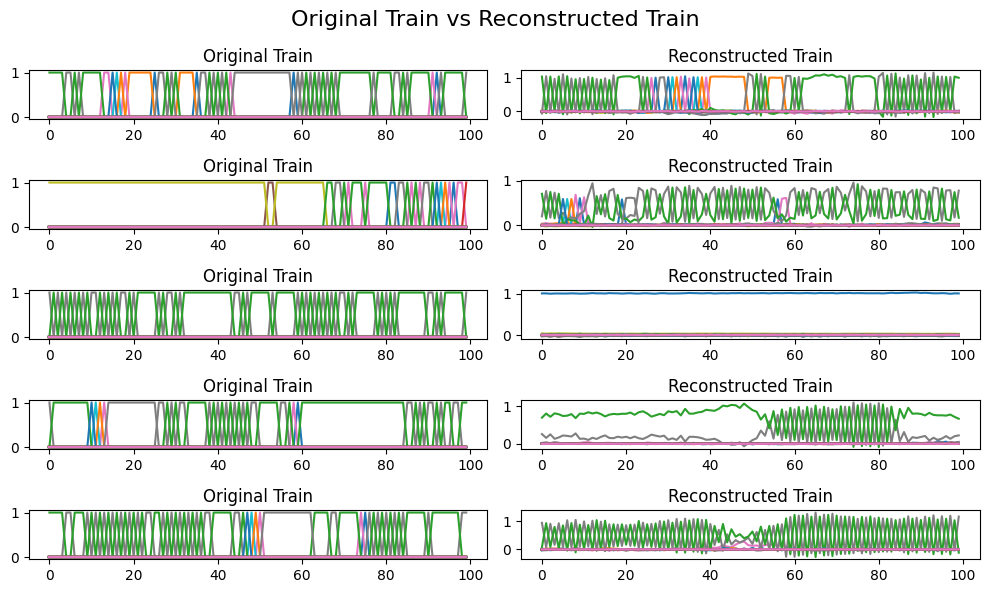

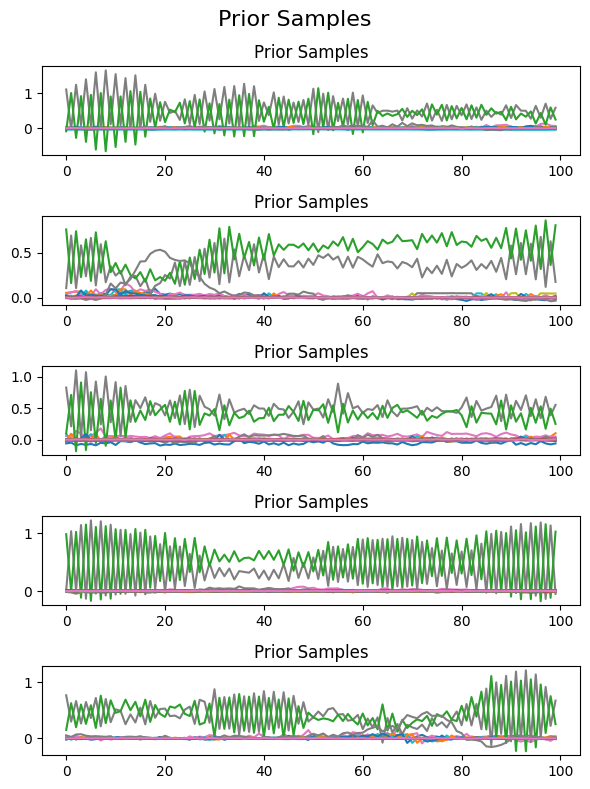

FileNotFoundError: [Errno 2] No such file or directory: '/home/siwamura/timeVAE/outputs/tsne/T1105(full)/ratio_0.8/train/Model-timeVAE Dataset-T1105(full)/ratio_0.8/train.png'

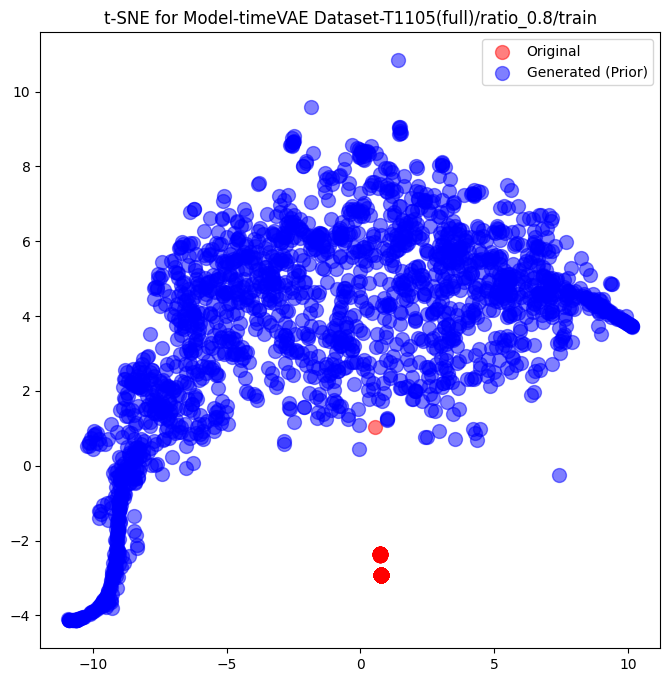

In [7]:
run_vae_pipeline(
    dataset_file = "T1105(full)/ratio_0.8/train", # 拡張子不要
    vae_type = "timeVAE",
)

### test

In [4]:
evaluate_anomaly_detection(
    model_dir = "../outputs/models/T1105(full)/ratio_0.8/train",
    test_data_dir = "../data/processed/T1105(full)/ratio_0.8",
    save_results_dir = "../results/T1105(full)/ratio_0.8/train",
)

スケーラーを読み込んでいます: ../outputs/models/T1105(full)/ratio_0.8/train...
モデル (timeVAE) を読み込んでいます: ../outputs/models/T1105(full)/ratio_0.8/train...


2025-12-18 00:13:43.228957: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22323 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-12-18 00:13:43.230831: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22323 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-12-18 00:13:43.232595: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22323 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:81:00.0, compute capability: 8.6
2025-12-18 00:13:43.234216: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22323 MB memory:  -> device: 3, name: NVIDIA GeForce RTX 3090

テストデータを読み込んでいます...
正常データ形状: (4107, 100, 57)
異常データ形状: (20, 100, 57)
推論を実行中...


I0000 00:00:1765984425.227372  645710 service.cc:145] XLA service 0x710ab4007d10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765984425.227419  645710 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765984425.227424  645710 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765984425.227428  645710 service.cc:153]   StreamExecutor device (2): NVIDIA GeForce RTX 3090, Compute Capability 8.6
I0000 00:00:1765984425.227432  645710 service.cc:153]   StreamExecutor device (3): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-12-18 00:13:45.264106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-18 00:13:45.347266: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000

min: 5.0841474e-05 max: 8276004000000.0
has inf: False has nan: False
len: 4127

ROC AUC スコア: 0.8807
ベスト F1 スコア: 0.0253 (しきい値: 83596000452.525299)
混同行列:
[[4049   58]
 [  19    1]]
再構成誤差ヒストグラムを保存しました: ../results/T1105(full)/ratio_0.8/train/reconstruction_error_hist.png
Precision-Recall カーブを保存しました: ../results/T1105(full)/ratio_0.8/train/precision_recall_curve.png


## Integrated (test：T1105)　DrainによるEventId

### データ作成

In [4]:
preprocess.prepare_integrated_deeplog_file(
    logdata_filepath = RAW_DIR/"Integrated/security2_structured.csv",
    window_size = 200,
    step_size = 100,
    mode = "fixed", 
    features = ["EventId"]
)

there are 8497 instances (sliding windows) in this dataset

there are 1777 instances (sliding windows) in this dataset

there are 1939 instances (sliding windows) in this dataset

there are 1951 instances (sliding windows) in this dataset

Sequence Length Statistics Report
Generated: 2025-12-18 04:48:38
Mode: fixed
Window Size: 200
Step Size: 100

[Ratio: 0.8]
--------------------------------------------------
  train:
    Count:    12,246
    Avg Len:  200.00
    Min Len:  200
    Max Len:  200
    Std Dev:  0.00
  test_normal:
    Count:    939
    Avg Len:  200.00
    Min Len:  200
    Max Len:  200
    Std Dev:  0.00
  test_abnormal:
    Count:    979
    Avg Len:  200.00
    Min Len:  200
    Max Len:  200
    Std Dev:  0.00


Statistics saved to: ../data/interim/Integrated/seq_stats.txt


In [5]:
scenarios = ["T1105", "WEB1", "WEB2"]

for scenario in scenarios:
    # one-hot-embed でテンソルへ変換
    preprocess.convert_deeplog_to_ohe_npz(
        input_dir = Path(f"../data/interim/Integrated/ratio_0.8/{scenario}"),
        output_dir = Path(f"../data/processed/Integrated/ratio_0.8/{scenario}")
    )

Building vocabulary from all data files...
Vocab size: 57
Processing ../data/interim/Integrated/ratio_0.8/T1105/train ...
  Max sequence length: 200
  Saved to ../data/processed/Integrated/ratio_0.8/T1105/train.npz (Shape: (12246, 200, 57))
Processing ../data/interim/Integrated/ratio_0.8/T1105/test_normal ...
  Max sequence length: 200
  Saved to ../data/processed/Integrated/ratio_0.8/T1105/test_normal.npz (Shape: (353, 200, 57))
Processing ../data/interim/Integrated/ratio_0.8/T1105/test_abnormal ...
  Max sequence length: 200
  Saved to ../data/processed/Integrated/ratio_0.8/T1105/test_abnormal.npz (Shape: (13, 200, 57))
Done.
Building vocabulary from all data files...
Vocab size: 59
Processing ../data/interim/Integrated/ratio_0.8/WEB1/train ...
  Max sequence length: 200
  Saved to ../data/processed/Integrated/ratio_0.8/WEB1/train.npz (Shape: (12246, 200, 59))
Processing ../data/interim/Integrated/ratio_0.8/WEB1/test_normal ...
  Max sequence length: 200
  Saved to ../data/processed/

### train

Training TimeVAE_Torch on cuda...
Epoch [1/1000], Loss: 408.2073, Recon Loss: 130.1801, KL Loss: 17.6670
Epoch [2/1000], Loss: 347.4796, Recon Loss: 110.4624, KL Loss: 16.0925
Epoch [3/1000], Loss: 341.4217, Recon Loss: 109.2896, KL Loss: 13.5530
Epoch [4/1000], Loss: 307.2929, Recon Loss: 97.0270, KL Loss: 16.2119
Epoch [5/1000], Loss: 293.2490, Recon Loss: 92.2860, KL Loss: 16.3911
Epoch [6/1000], Loss: 289.6392, Recon Loss: 91.3505, KL Loss: 15.5878
Epoch [7/1000], Loss: 287.5346, Recon Loss: 90.8076, KL Loss: 15.1118
Epoch [8/1000], Loss: 285.8727, Recon Loss: 90.3807, KL Loss: 14.7306
Epoch [9/1000], Loss: 284.4467, Recon Loss: 89.9961, KL Loss: 14.4585
Epoch [10/1000], Loss: 283.5925, Recon Loss: 89.7716, KL Loss: 14.2776
Epoch [11/1000], Loss: 282.5341, Recon Loss: 89.4756, KL Loss: 14.1072
Epoch [12/1000], Loss: 281.8172, Recon Loss: 89.2768, KL Loss: 13.9867
Epoch [13/1000], Loss: 281.0803, Recon Loss: 89.0649, KL Loss: 13.8856
Epoch [14/1000], Loss: 280.4273, Recon Loss: 88.8

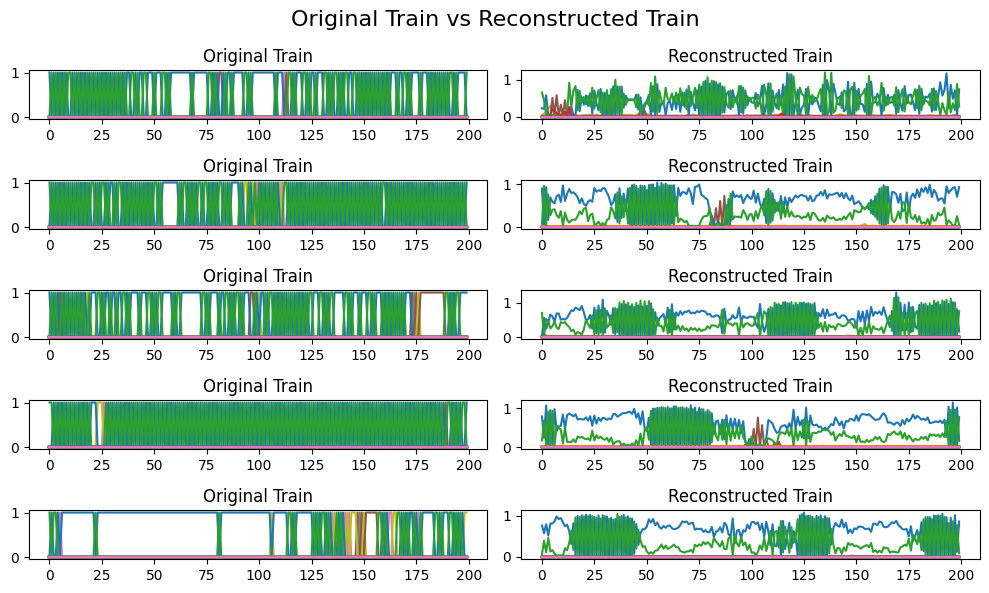

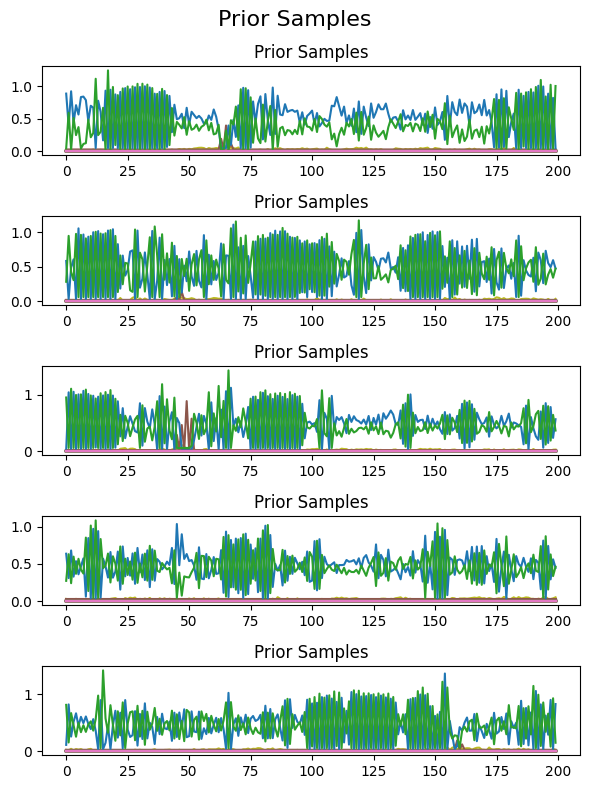

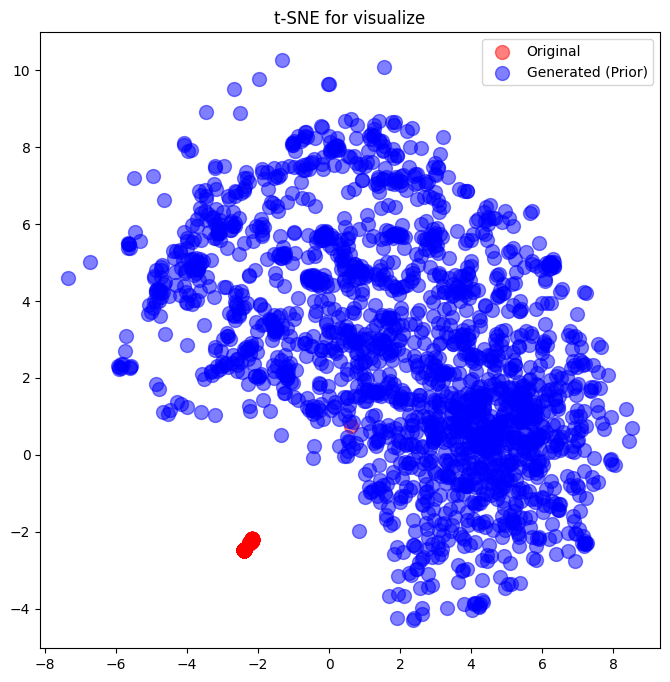

Preds from orig and loaded models equal:  False


In [6]:
run_vae_pipeline(
    dataset_file = "Integrated/ratio_0.8/T1105/train", # 拡張子不要
    vae_type = "timeVAE_torch",
)

### test

In [6]:
evaluate_anomaly_detection(
    model_dir = "../outputs/models/timeVAE/Integrated/ratio_0.8/T1105/train",
    test_data_dir = "../data/processed/Integrated/ratio_0.8/T1105",
    save_results_dir = "../results/Integrated/ratio_0.8/T1105",
)

スケーラーを読み込んでいます: ../outputs/models/timeVAE/Integrated/ratio_0.8/T1105/train...
モデル (timeVAE) を読み込んでいます: ../outputs/models/timeVAE/Integrated/ratio_0.8/T1105/train...
テストデータを読み込んでいます...
正常データ形状: (353, 200, 59)
異常データ形状: (13, 200, 59)
推論を実行中...
min: 0.00037124642 max: 8019172700000.0
has inf: False has nan: False
len: 366

ROC AUC スコア: 0.8886
ベスト F1 スコア: 0.0833 (しきい値: 81001743990.949860)
混同行列:
[[343  10]
 [ 12   1]]
再構成誤差ヒストグラムを保存しました: ../results/Integrated/ratio_0.8/T1105/reconstruction_error_hist.png
Precision-Recall カーブを保存しました: ../results/Integrated/ratio_0.8/T1105/precision_recall_curve.png


## Integrated (test：T1105)  sentence-BERT 埋め込み利用

### データ作成

In [19]:
preprocess.prepare_integrated_deeplog_file(
    logdata_filepath = RAW_DIR/"Integrated/security2_structured.csv",
    features = ["EventID"],
    window_size = 200,
    step_size = 100,
    mode = "fixed", 
)

there are 8497 instances (sliding windows) in this dataset

there are 1777 instances (sliding windows) in this dataset

there are 1939 instances (sliding windows) in this dataset

there are 1951 instances (sliding windows) in this dataset

Sequence Length Statistics Report
Generated: 2025-12-18 22:45:24
Mode: fixed
Window Size: 200
Step Size: 100

[Ratio: 0.8]
--------------------------------------------------
  train:
    Count:    12,246
    Avg Len:  200.00
    Min Len:  200
    Max Len:  200
    Std Dev:  0.00
  test_normal:
    Count:    939
    Avg Len:  200.00
    Min Len:  200
    Max Len:  200
    Std Dev:  0.00
  test_abnormal:
    Count:    979
    Avg Len:  200.00
    Min Len:  200
    Max Len:  200
    Std Dev:  0.00


Statistics saved to: ../data/interim/Integrated/seq_stats.txt


In [22]:
scenarios = ["T1105", "WEB1", "WEB2"]

for scenario in scenarios:
    # BERT埋め込み() でテンソルへ変換
    preprocess.convert_deeplog_to_embedding_npz(
        input_dir = Path(f"../data/interim/Integrated/ratio_0.8/{scenario}"),
        output_dir = Path(f"../data/processed/Integrated/ratio_0.8/{scenario}"),
        embedding_dir= Path("../data/embedding/")
    )

Loading embeddings from ../data/embedding ...
Embedding Vocab Size: 423, Dimension: 384
Processing ../data/interim/Integrated/ratio_0.8/T1105/train ...
  Max sequence length: 200
  No OOV tokens found.
  Saved to ../data/processed/Integrated/ratio_0.8/T1105/train.npz (Shape: (12246, 200, 384))
Processing ../data/interim/Integrated/ratio_0.8/T1105/test_normal ...
  Max sequence length: 200
  No OOV tokens found.
  Saved to ../data/processed/Integrated/ratio_0.8/T1105/test_normal.npz (Shape: (353, 200, 384))
Processing ../data/interim/Integrated/ratio_0.8/T1105/test_abnormal ...
  Max sequence length: 200
  No OOV tokens found.
  Saved to ../data/processed/Integrated/ratio_0.8/T1105/test_abnormal.npz (Shape: (13, 200, 384))
Done.
Loading embeddings from ../data/embedding ...
Embedding Vocab Size: 423, Dimension: 384
Processing ../data/interim/Integrated/ratio_0.8/WEB1/train ...
  Max sequence length: 200
  No OOV tokens found.
  Saved to ../data/processed/Integrated/ratio_0.8/WEB1/train.

In [9]:
path = "/home/siwamura/timeVAE/data/processed/T1105(full)/ratio_0.8/train.npz"

with np.load(path) as npz:
    print(npz.files)  # 中に入っている配列名の一覧
    for key in npz.files:
        arr = npz[key]
        print(key, arr.shape, arr.dtype)

['data']
data (16425, 100, 384) float32


### train

Training TimeVAE_Torch on cuda...
Epoch [1/1000], Loss: 7110.9671, Recon Loss: 2361.5526, KL Loss: 26.3094
Epoch [2/1000], Loss: 5086.1152, Recon Loss: 1685.9241, KL Loss: 28.3430
Epoch [3/1000], Loss: 4880.1958, Recon Loss: 1617.1304, KL Loss: 28.8046
Epoch [4/1000], Loss: 4809.9867, Recon Loss: 1593.9208, KL Loss: 28.2243
Epoch [5/1000], Loss: 4781.2183, Recon Loss: 1584.6052, KL Loss: 27.4026
Epoch [6/1000], Loss: 4691.0980, Recon Loss: 1554.2154, KL Loss: 28.4519
Epoch [7/1000], Loss: 4420.9901, Recon Loss: 1463.6859, KL Loss: 29.9325
Epoch [8/1000], Loss: 4323.3051, Recon Loss: 1431.2684, KL Loss: 29.4998
Epoch [9/1000], Loss: 4274.0784, Recon Loss: 1414.7778, KL Loss: 29.7450
Epoch [10/1000], Loss: 4232.7040, Recon Loss: 1401.0081, KL Loss: 29.6796
Epoch [11/1000], Loss: 4198.2794, Recon Loss: 1389.4475, KL Loss: 29.9367
Epoch [12/1000], Loss: 4163.9514, Recon Loss: 1378.0010, KL Loss: 29.9483
Epoch [13/1000], Loss: 4154.7044, Recon Loss: 1374.9075, KL Loss: 29.9817
Epoch [14/100

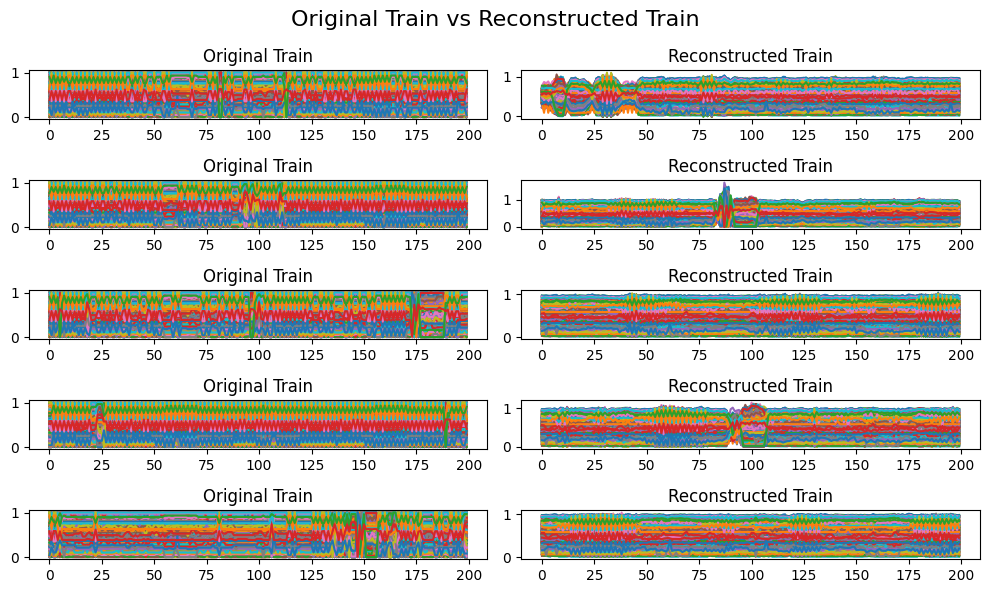

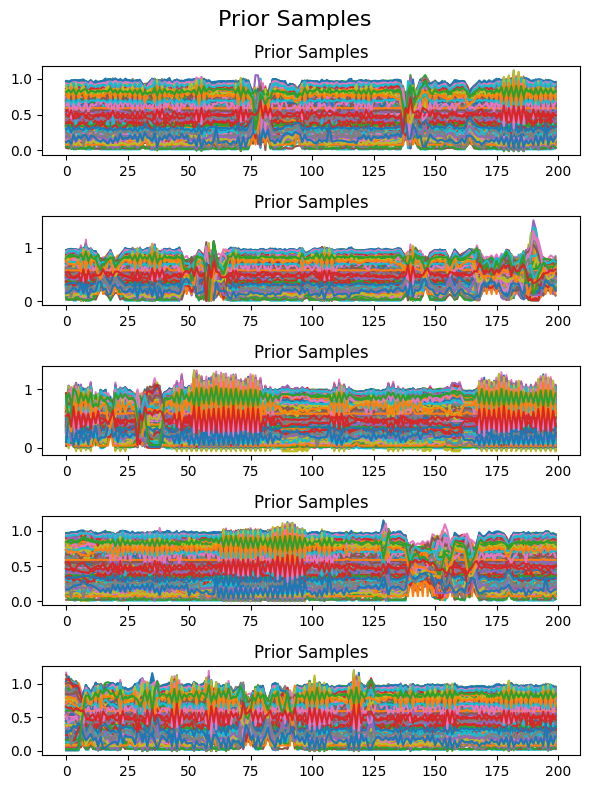

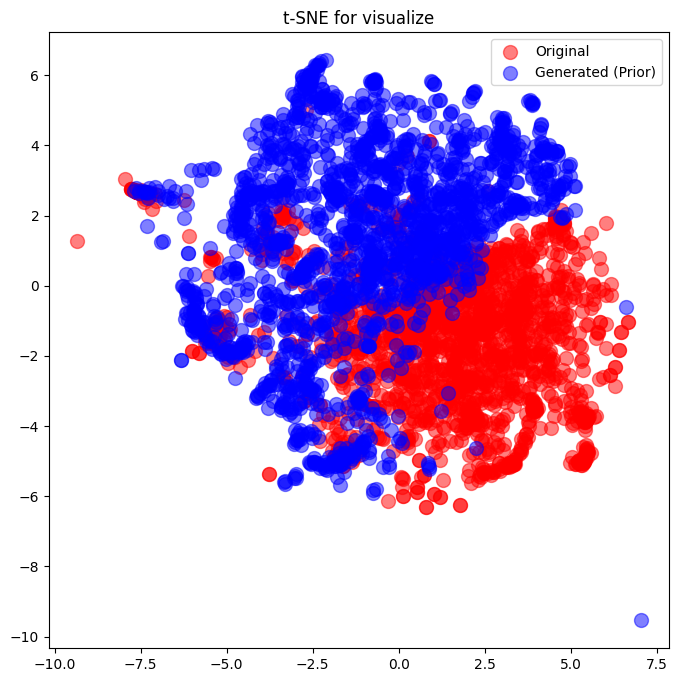

Preds from orig and loaded models equal:  False


In [4]:
run_vae_pipeline(
    dataset_file = "Integrated/ratio_0.8/T1105/train", # data/processed 以下：拡張子不要
    vae_type = "timeVAE_torch",
)

In [4]:
evaluate_anomaly_detection(
    model_dir = "../outputs/models/timeVAE_torch/Integrated/ratio_0.8/T1105/train",
    test_data_dir = "../data/processed/Integrated/ratio_0.8/T1105",
    save_results_dir = "../results/timeVAE_torch/Integrated/ratio_0.8/T1105",
)

vae_typeが指定されていません。../outputs/models/timeVAE_torch/Integrated/ratio_0.8/T1105/trainからモデルタイプを自動検出します...
  → PyTorchモデルを検出: vae_type='timeVAE_torch'
スケーラーを読み込んでいます: ../outputs/models/timeVAE_torch/Integrated/ratio_0.8/T1105/train...
モデル (timeVAE_torch) を読み込んでいます: ../outputs/models/timeVAE_torch/Integrated/ratio_0.8/T1105/train...
テストデータを読み込んでいます...
正常データ形状: (353, 200, 384)
異常データ形状: (13, 200, 384)
推論を実行中...
min: 0.0005624164 max: 0.1335593
has inf: False has nan: False
len: 366

ROC AUC スコア: 0.9287
ベスト F1 スコア: 0.3529 (しきい値: 0.035491)
混同行列:
[[310  43]
 [  1  12]]
再構成誤差ヒストグラムを保存しました: ../results/timeVAE_torch/Integrated/ratio_0.8/T1105/reconstruction_error_hist.png
Precision-Recall カーブを保存しました: ../results/timeVAE_torch/Integrated/ratio_0.8/T1105/precision_recall_curve.png
